In [ ]:
!pip install dask[complete] -U --quiet

## Day 77 Lecture 1 Assignment

In this assignment, we will learn about convolutions using Dask arrays.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import dask.array as da

In [6]:
import os
import random

import cv2
import numpy as np
import pandas as pd

In [8]:
image = cv2.imread('/content/drive/MyDrive/python_for_data_scientists/6-facial-recognition-hero.jpg', cv2.IMREAD_GRAYSCALE)

In [9]:
image.shape

(1360, 2040)

In [23]:
image_da = da.asarray(image)

In [24]:
image_da

dask.array<array, shape=(1360, 2040), dtype=uint8, chunksize=(1360, 2040), chunktype=numpy.ndarray>

Rechunk the image array into chunks of 100x100.

In [25]:
# Answer below

image_da = da.rechunk(image_da, chunks=(100,100)) 

In [26]:
image_da

dask.array<rechunk-merge, shape=(1360, 2040), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In [27]:
image_da.shape

(1360, 2040)

In the code above, we read an image of a face and converted it into a Dask array. We will use this array to learn about convolutions. You can learn more about convolutions <a href="http://setosa.io/ev/image-kernels/">here</a>.

Convolutions are transformations of matrices that help us create convolutional neural network (which are crucial in deep learning) or apply effects to images like blurring or sharpening.

Our kernel is a 3x3 matrix which we apply to every 3x3 subset of our image matrix.

To start with our transformation, zero pad the image matrix with a width of one. This means that our output will be a matrix with an additional row and additional column of zeros on both sides. The image below illustrates padding. Use the pad function 
<img src="https://www.researchgate.net/profile/Terje_Midtbo/publication/318967374/figure/fig4/AS:669210783002634@1536563692382/Visualization-of-a-matrix-that-is-zero-padded-with-one-border.png">

In [13]:
# Answer below:
padded = da.pad(image_da, 1, mode='constant')

In [47]:
padded

dask.array<concatenate, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In [14]:
padded.compute()

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 163, 163, ..., 163, 163,   0],
       [  0, 163, 163, ..., 163, 163,   0],
       ...,
       [  0, 163, 163, ..., 163, 163,   0],
       [  0, 163, 163, ..., 163, 163,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

What is the shape of our padded array?

In [15]:
# Answer below:
padded.shape

(1362, 2042)

To apply a convolution, we will install the `dask-image` package. Do this below.

In [ ]:
# Answer below:
!pip install dask-image -- quiet

Import the convolve function from the package

In [19]:
# Answer below:
from dask_image.ndfilters import convolve

Define the sharpen convolution from the setosa.io article mentioned above. Apply the convolution to our padded image.

In [20]:
# Answer below:
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [50]:
sharpen_ = da.from_array(sharpen)

In [52]:
sharpen_

dask.array<array, shape=(3, 3), dtype=int64, chunksize=(3, 3), chunktype=numpy.ndarray>

In [53]:
vulve = convolve(padded, sharpen_)

In [54]:
vulve.shape

(1362, 2042)

In [35]:
vulve

dask.array<_trim, shape=(1362, 2042), dtype=uint8, chunksize=(100, 100), chunktype=numpy.ndarray>

In [30]:
from google.colab.patches import cv2_imshow

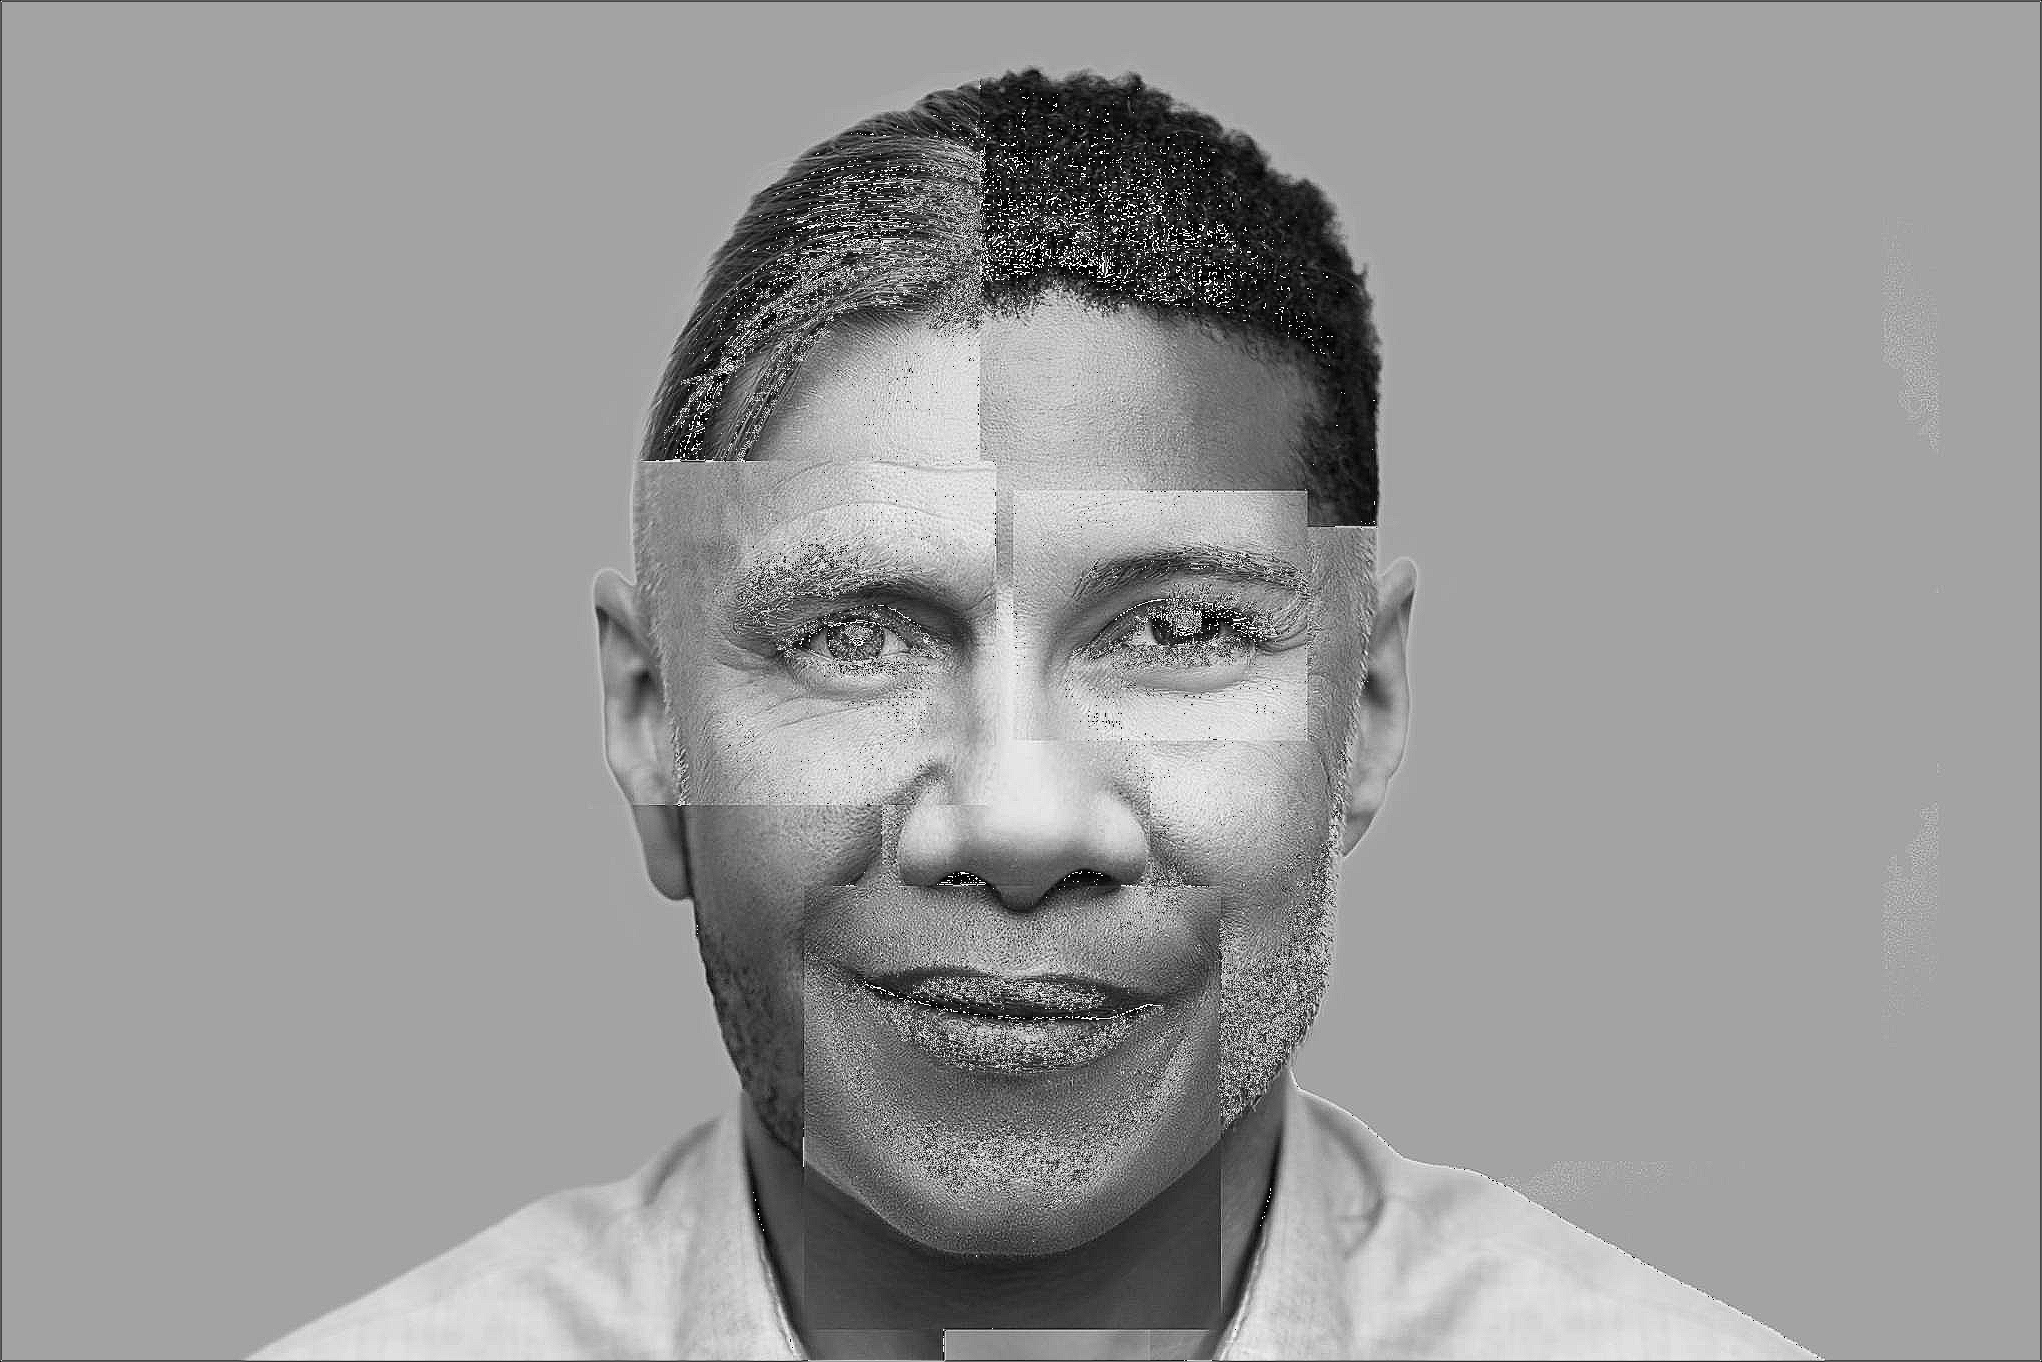

In [36]:
cv2_imshow(vulve.compute())

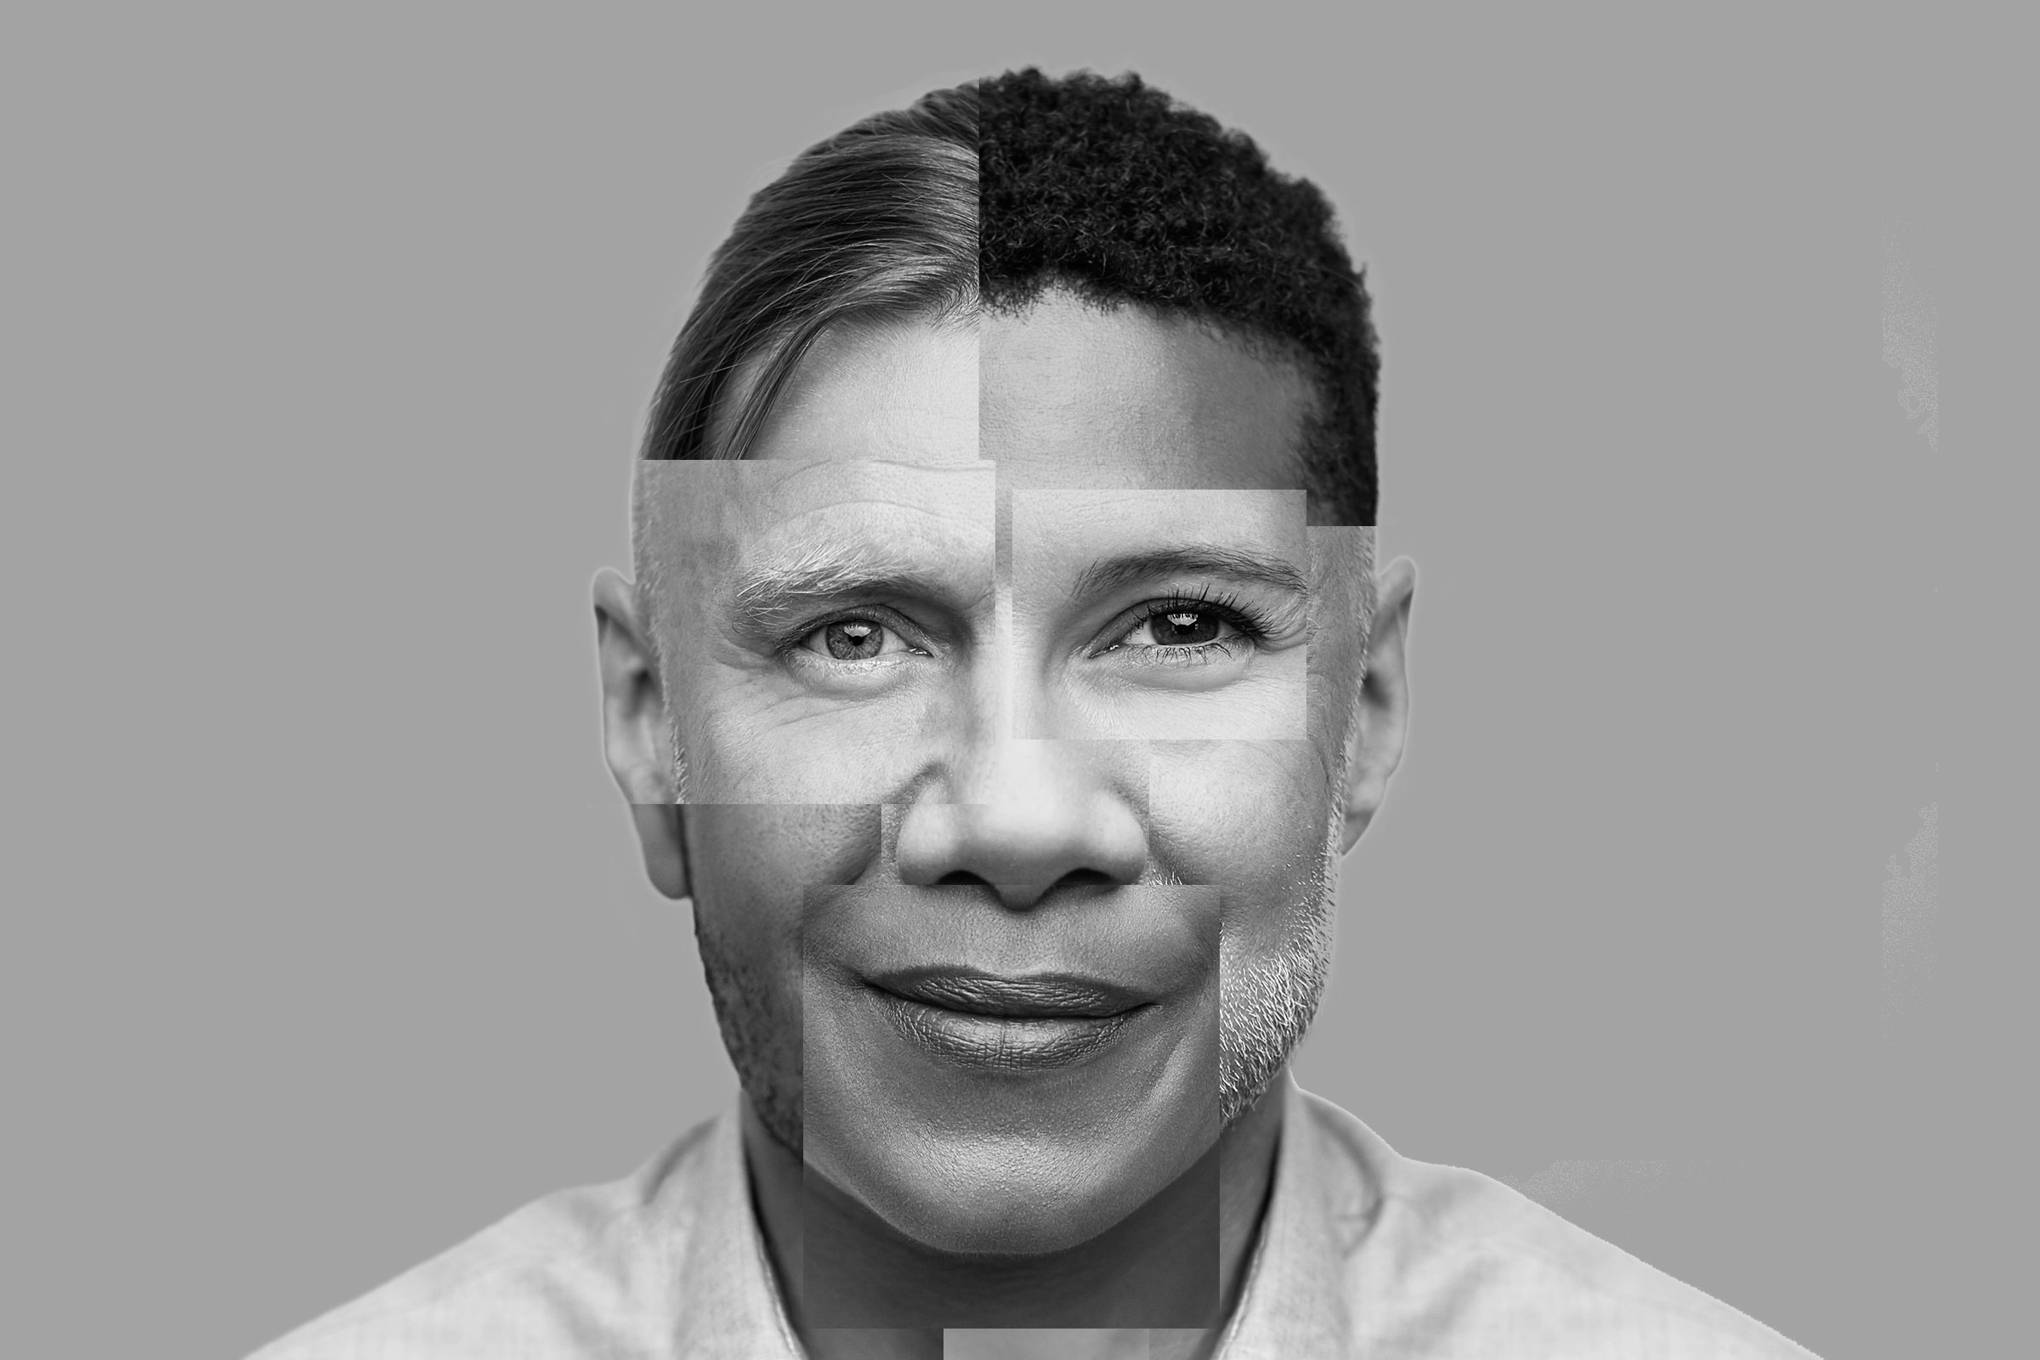

In [33]:
cv2_imshow(image_da.compute())

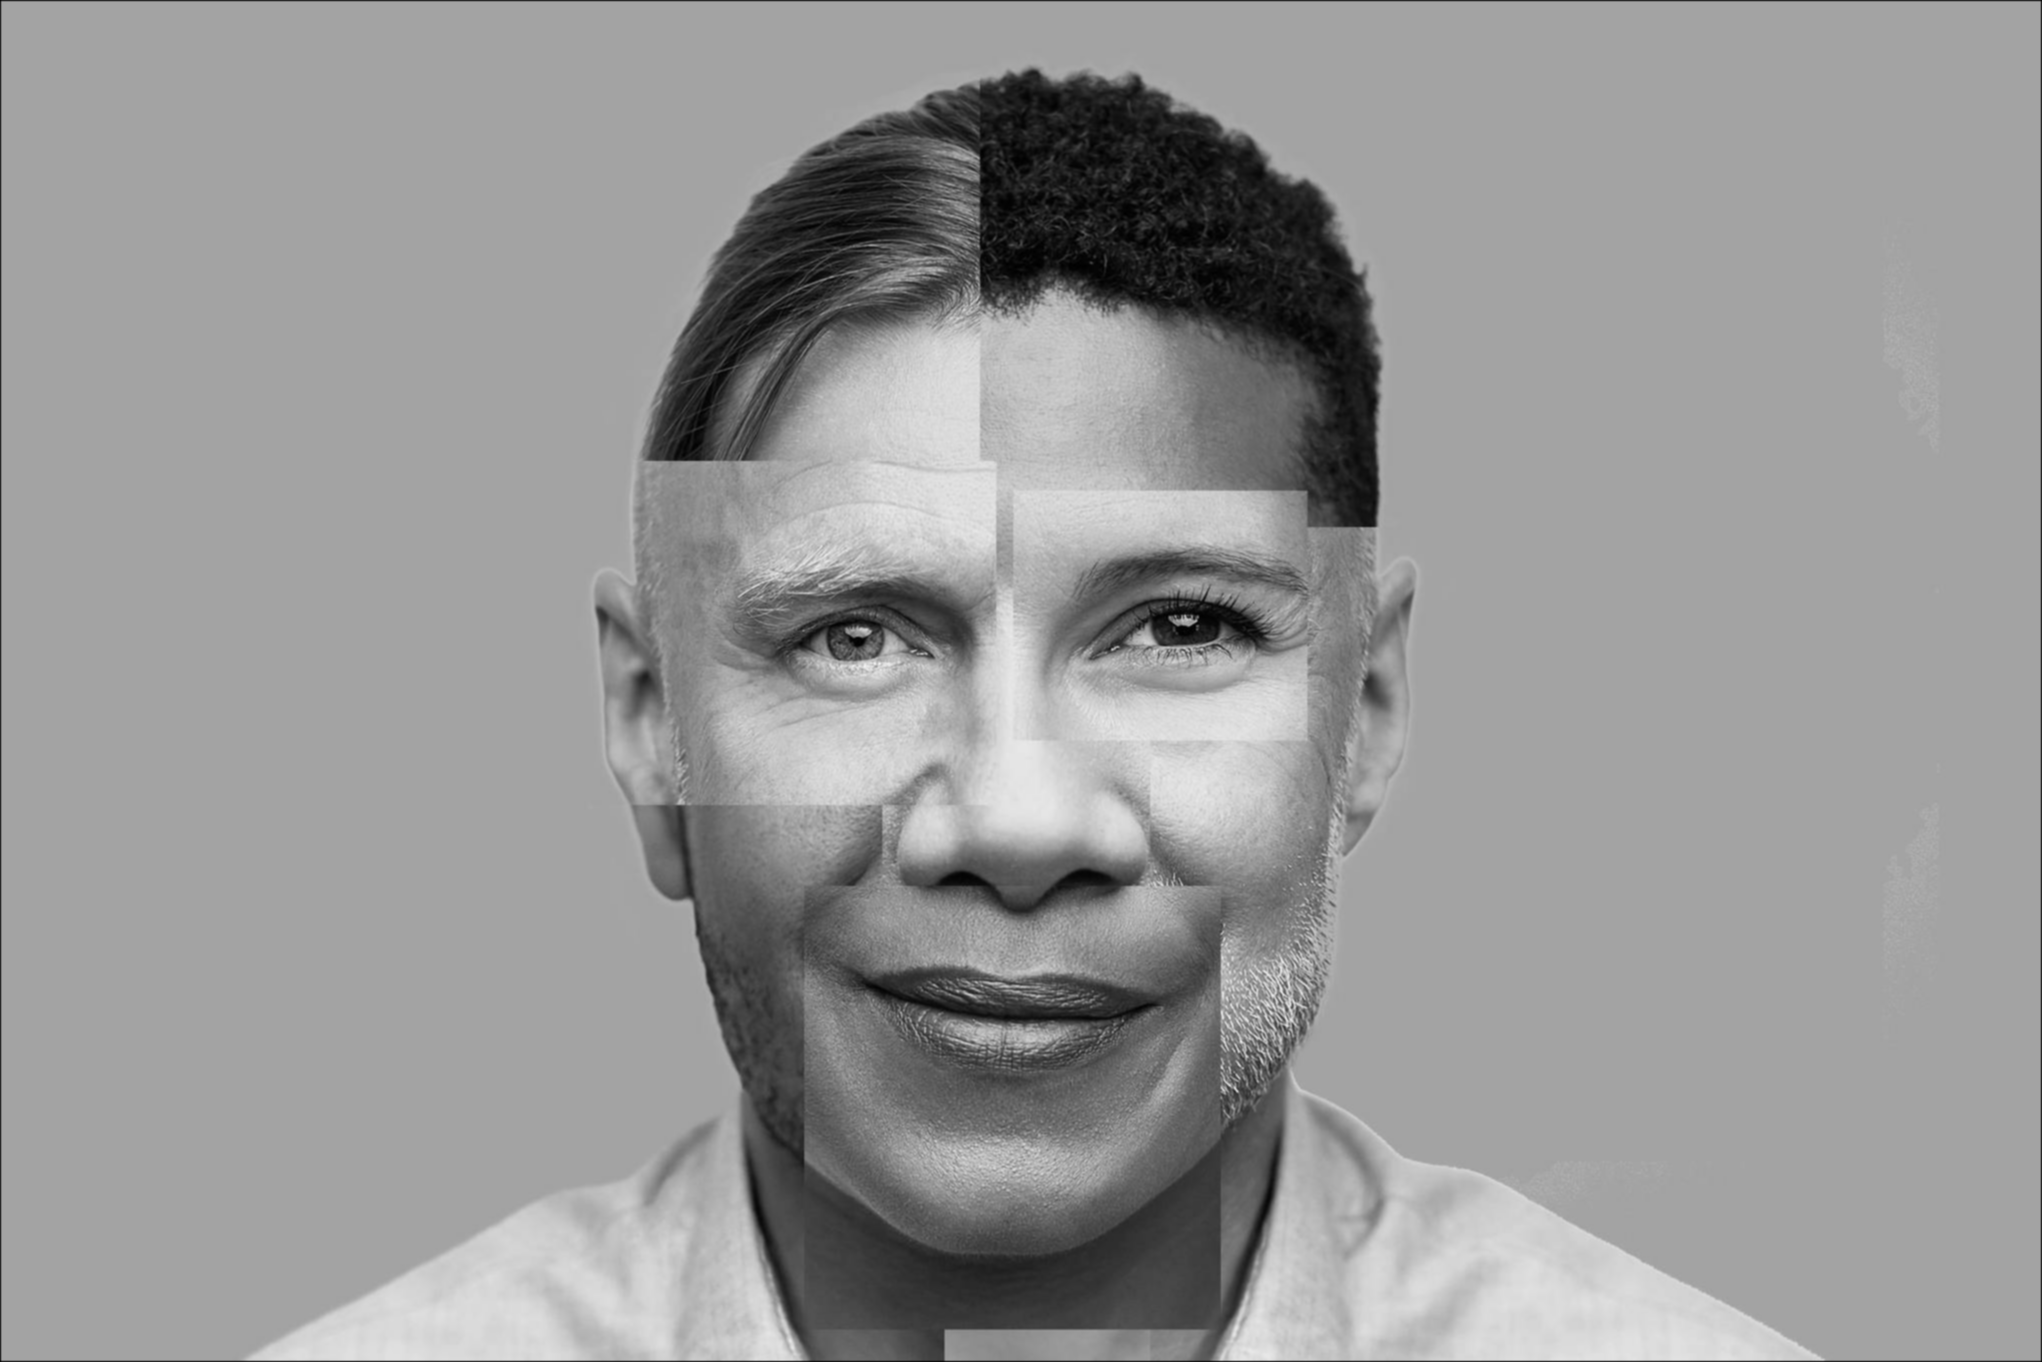

In [46]:
blur = np.array([[0.0625, .125, 0.0625], [.125, .25, .125], [0.0625, .125, 0.0625]])
blur_ = convolve(padded, blur)
cv2_imshow(blur_.compute())

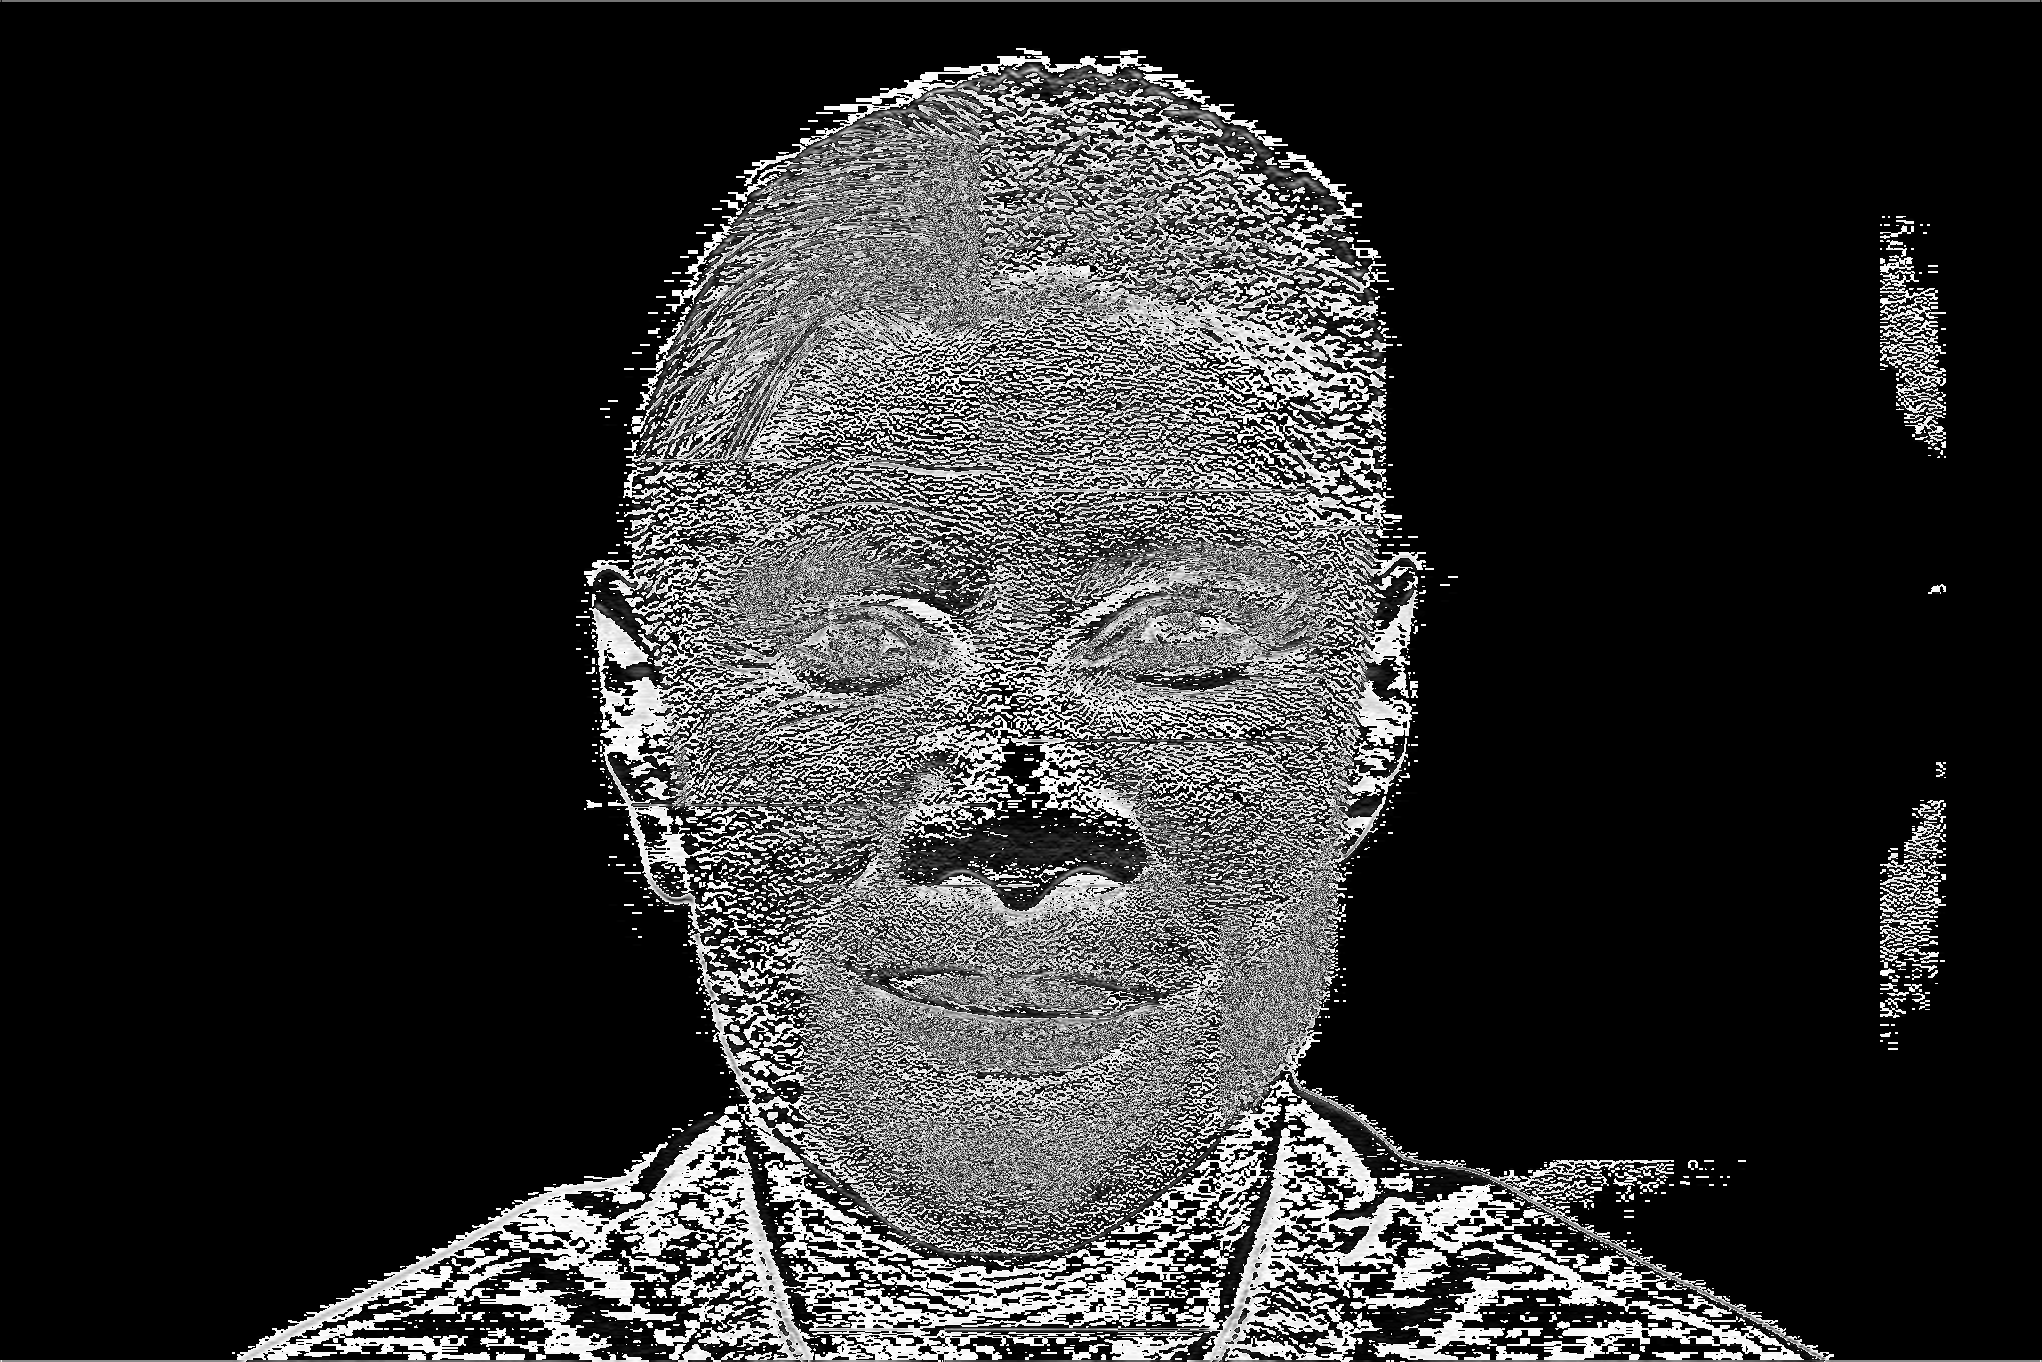

In [45]:
bottom_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
bottom_sobel_ = convolve(padded, bottom_sobel)
cv2_imshow(bottom_sobel_.compute())

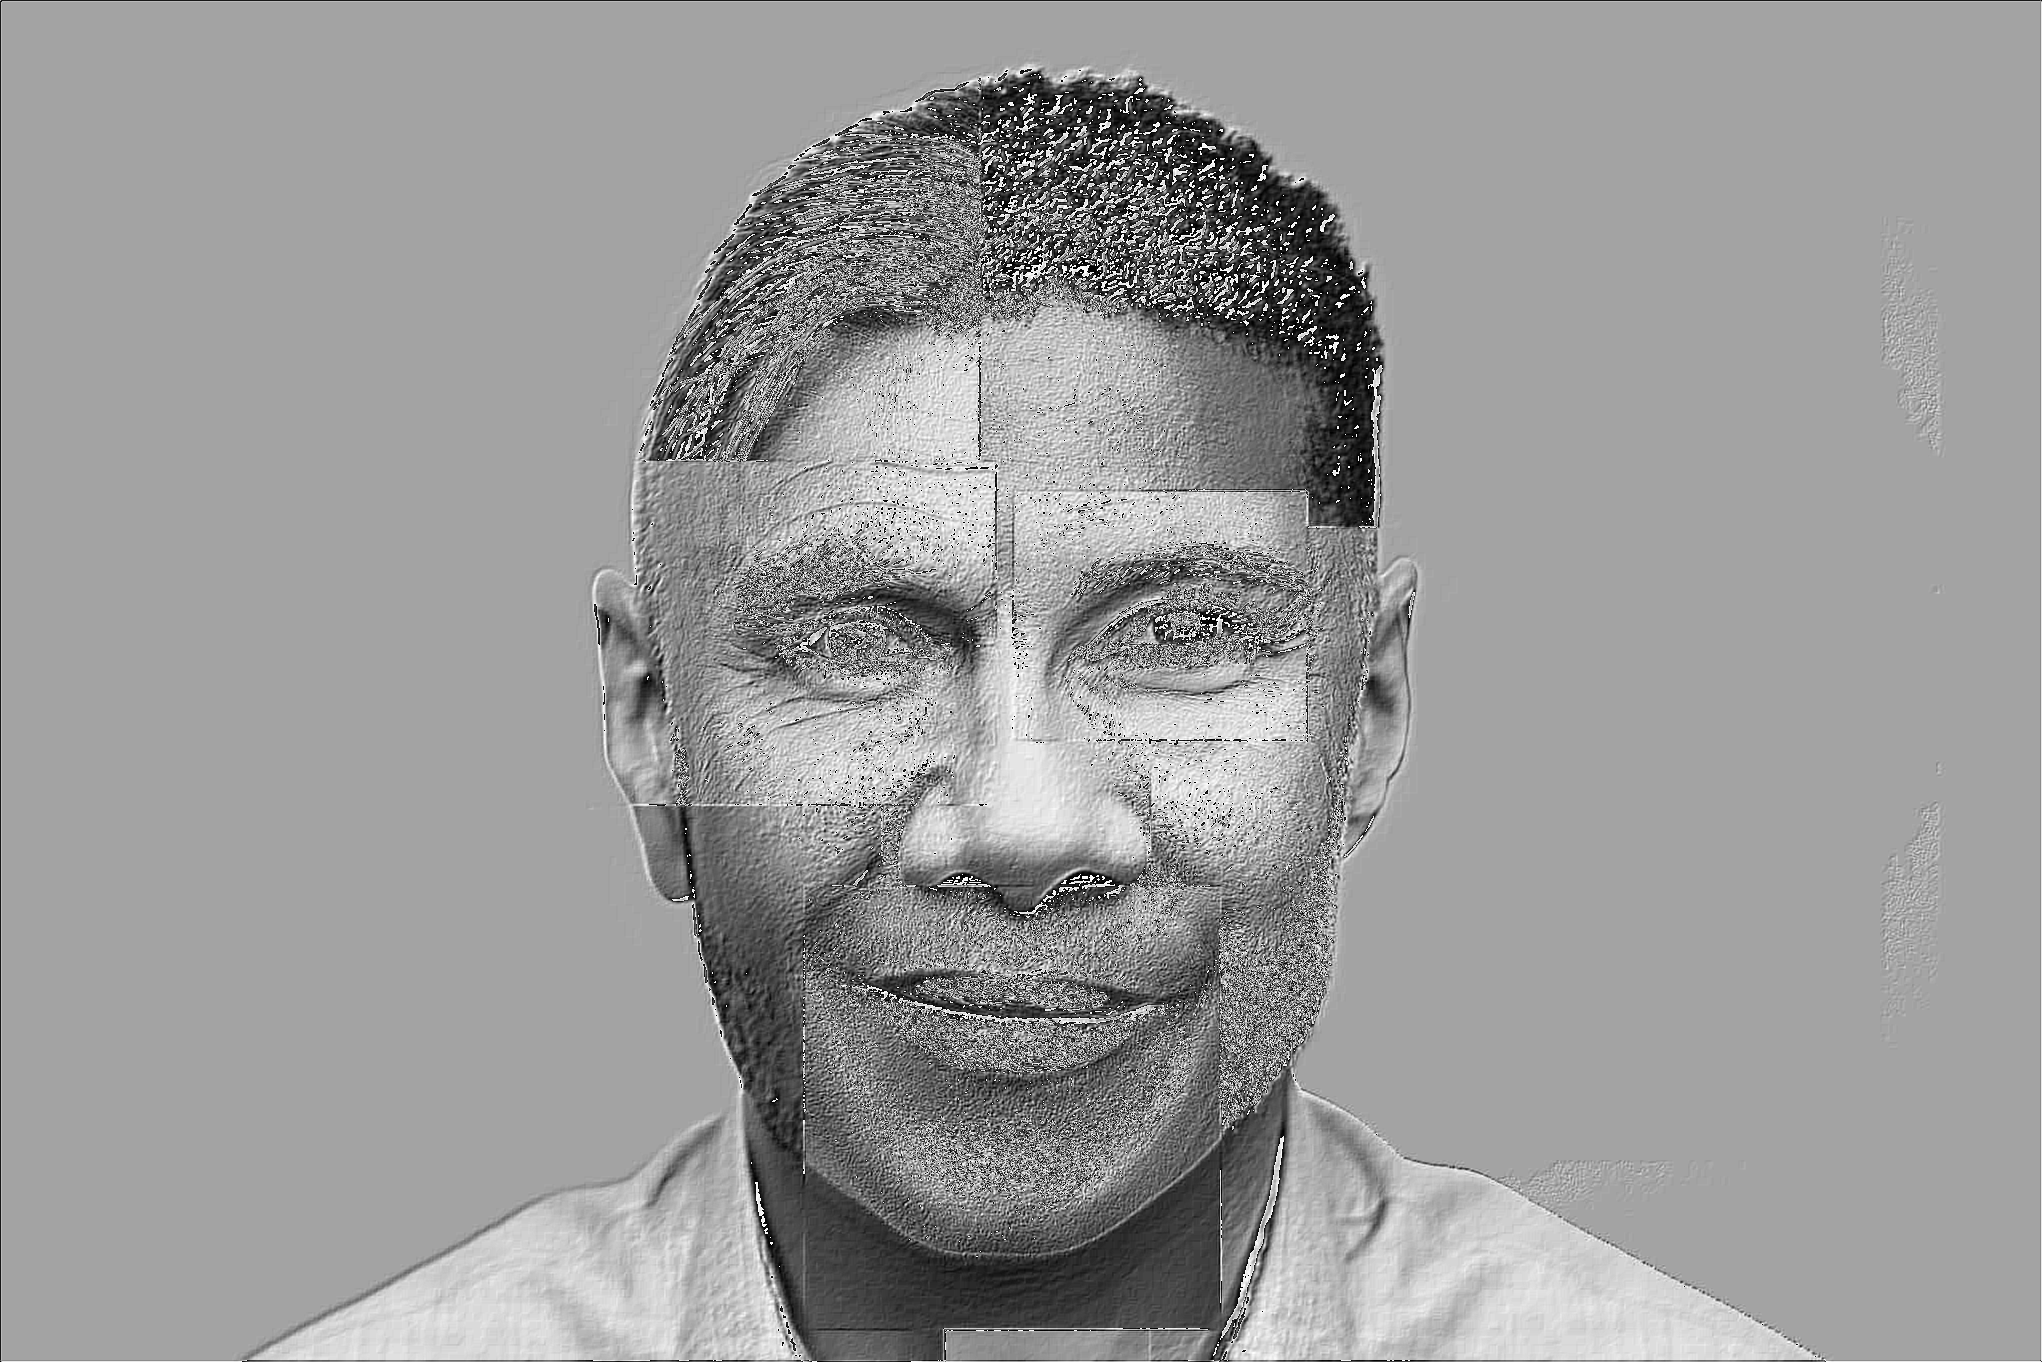

In [39]:
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
emboss_ = convolve(padded, emboss)
cv2_imshow(emboss_.compute())

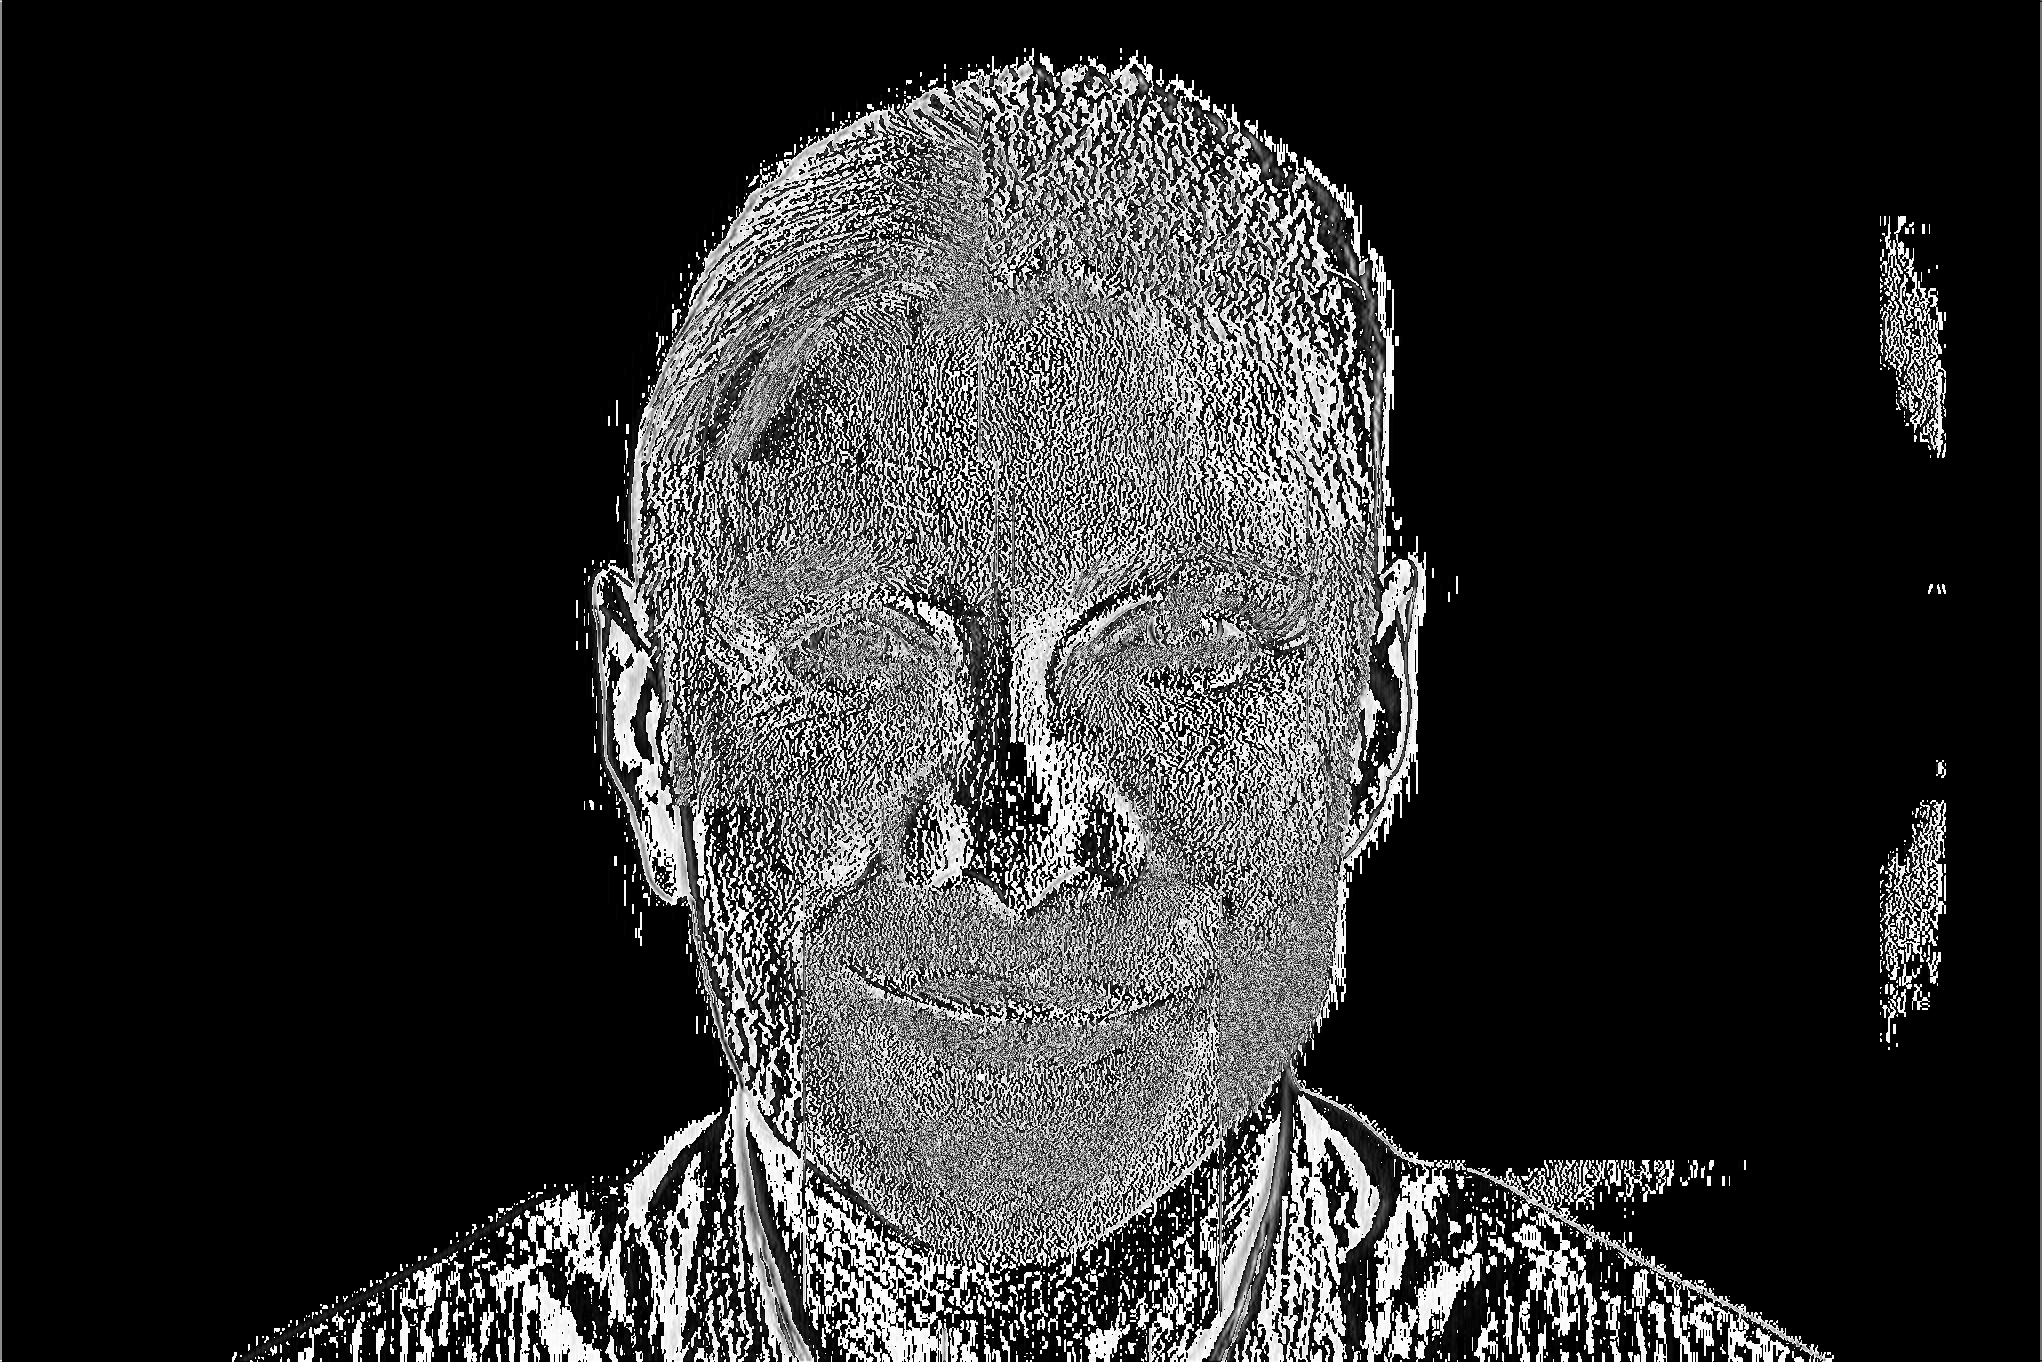

In [44]:
left_sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
left_sobel_ = convolve(padded, left_sobel)
cv2_imshow(left_sobel_.compute())

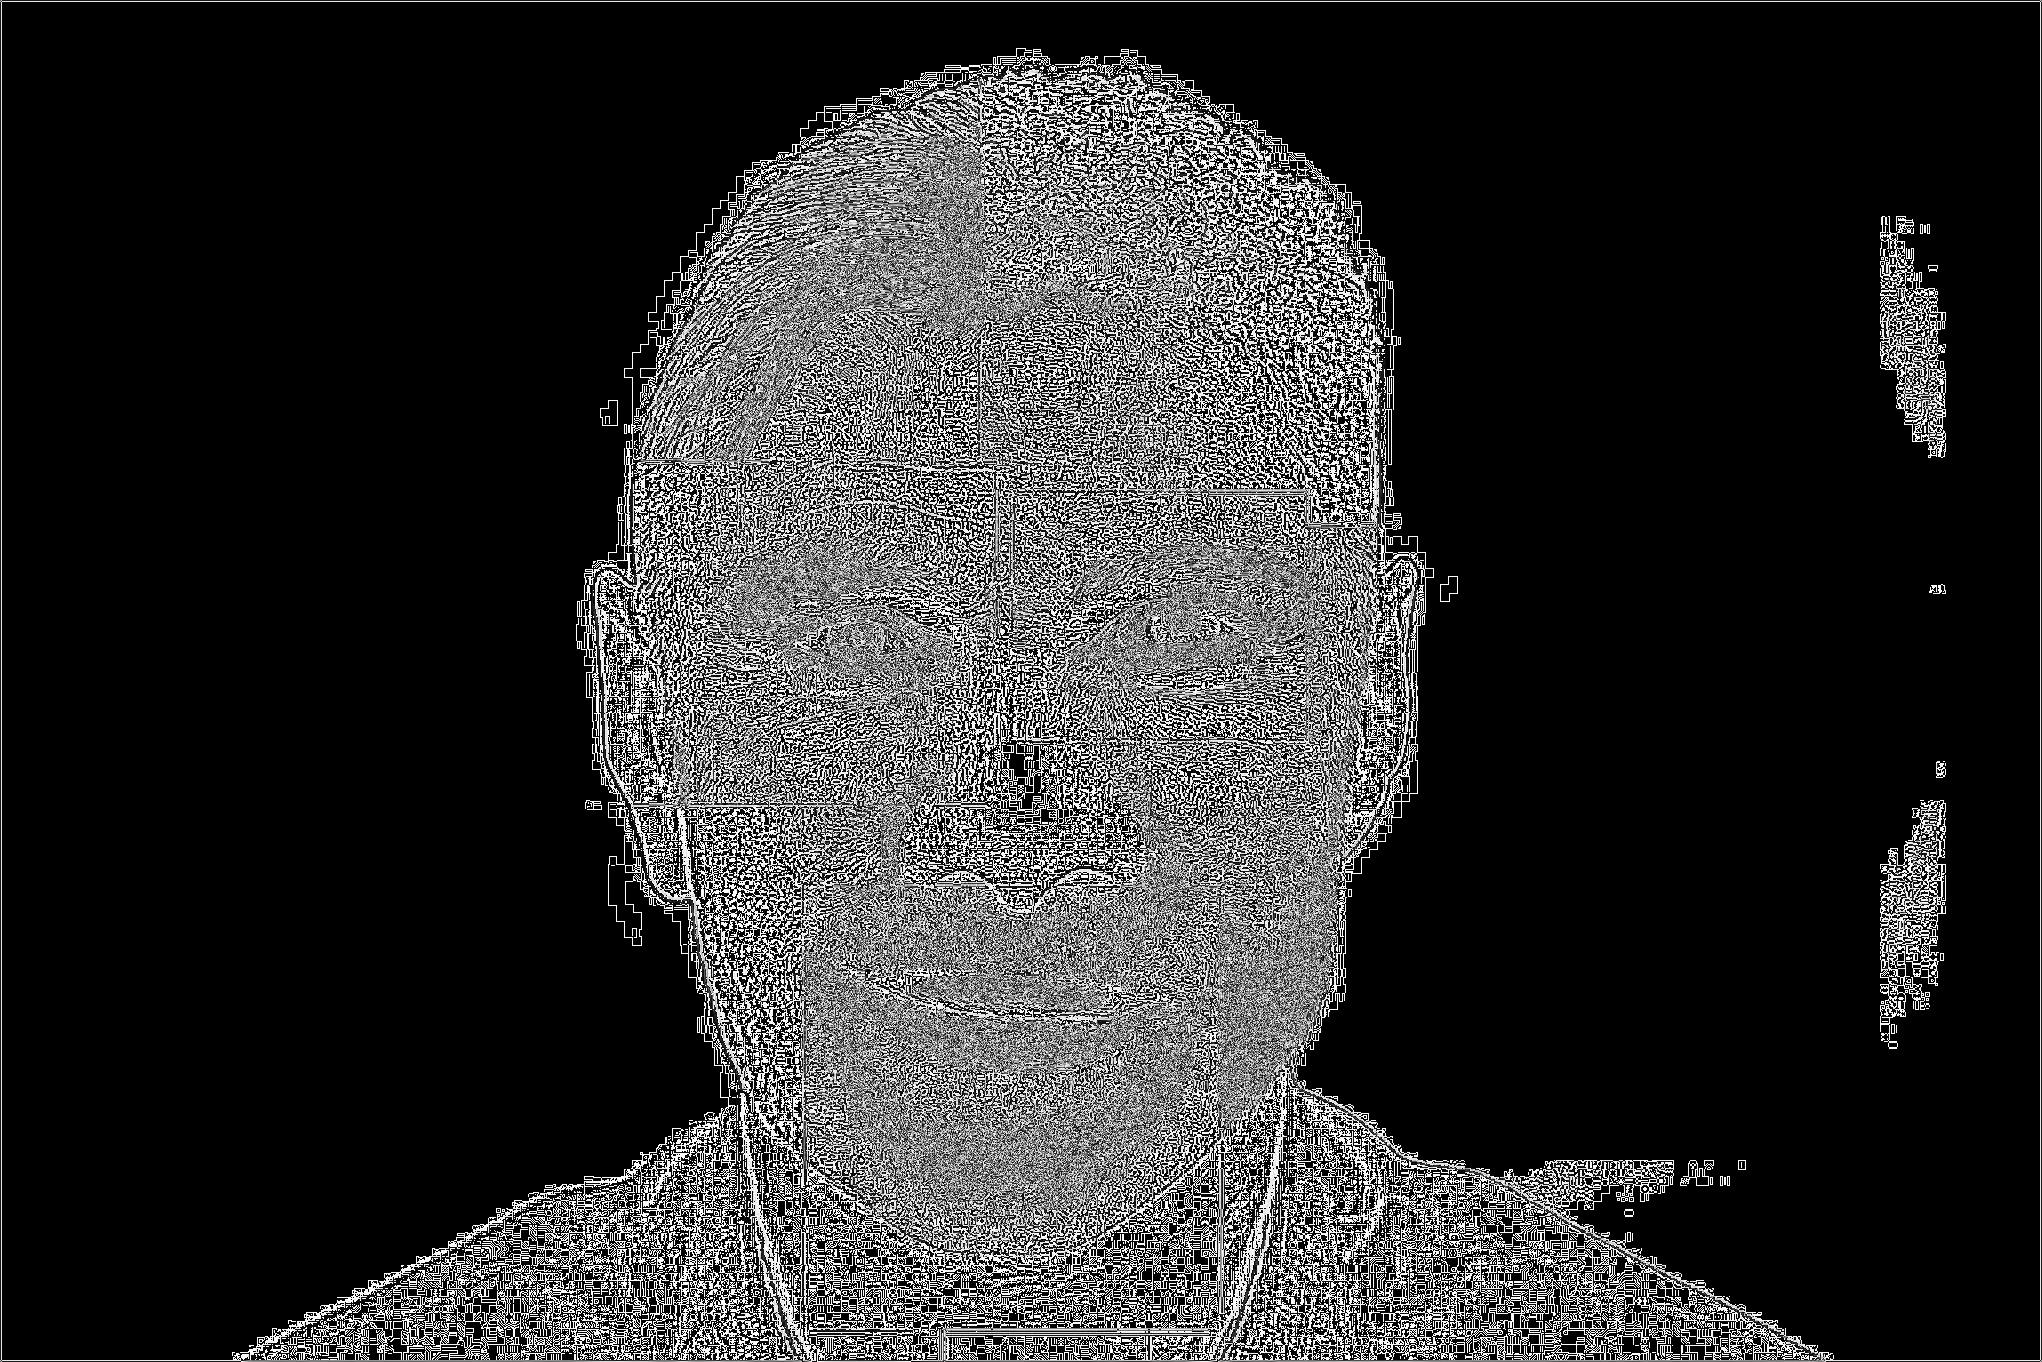

In [41]:
outline = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
outline_ = convolve(padded, outline)
cv2_imshow(outline_.compute())

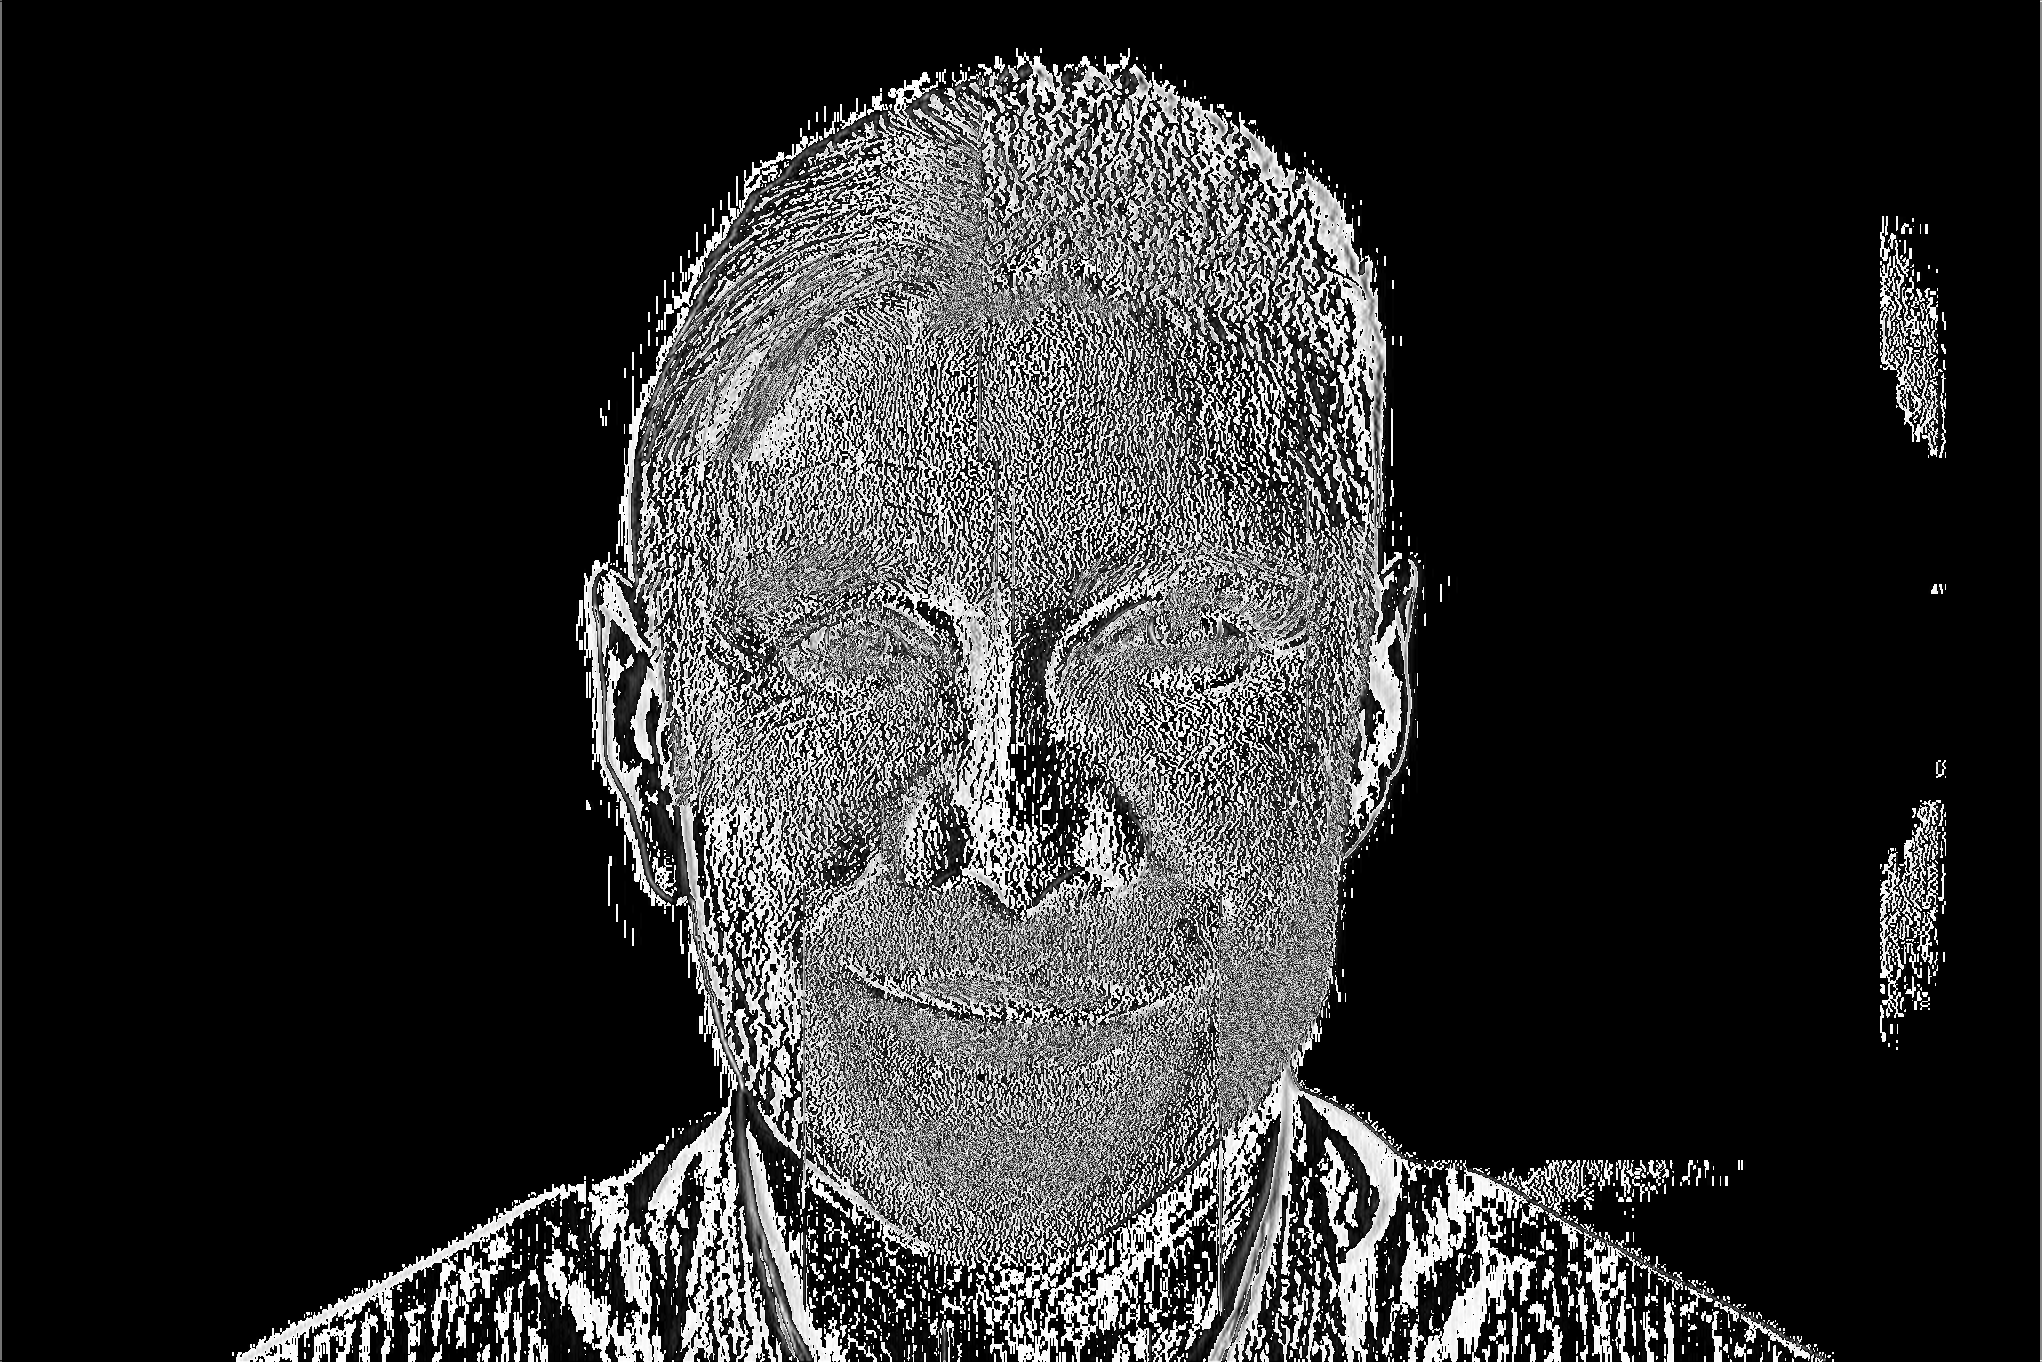

In [42]:
right_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
right_sobel_ = convolve(padded, right_sobel)
cv2_imshow(right_sobel_.compute())

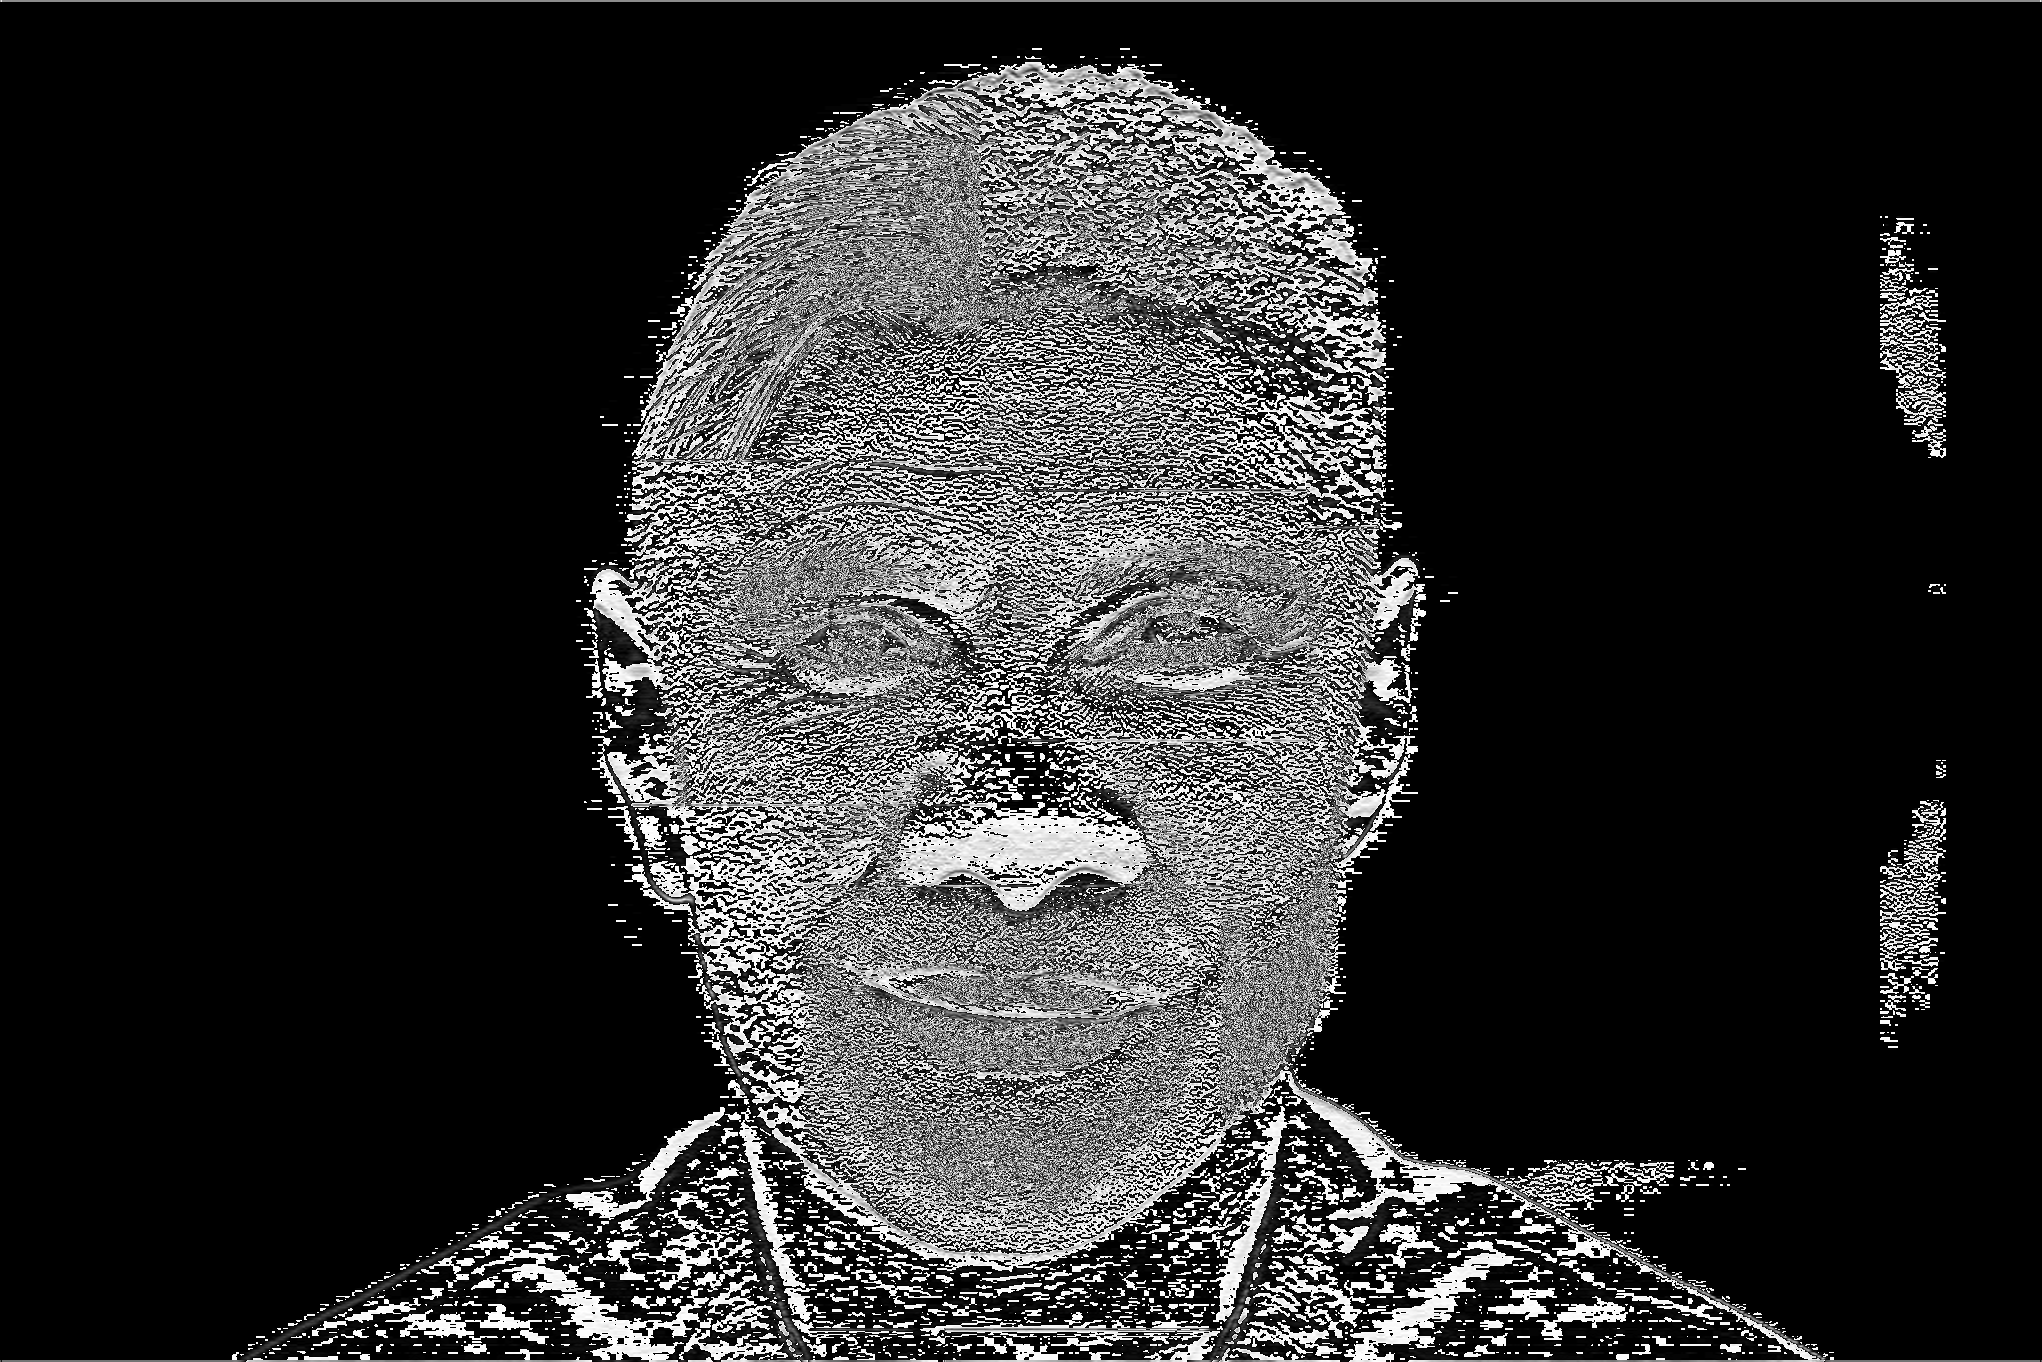

In [43]:
top_sobel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
top_sobel_ = convolve(padded, top_sobel)
cv2_imshow(top_sobel_.compute())